___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# MNIST Multi-Layer Perceptron

In this lecture we will build out a Multi Layer Perceptron model to try to classify hand written digits using TensorFlow (a very famous example).

Keep in mind that no single lecture (or course!) can cover the vastness that is Deep Learning, I would highly suggest reading MIT's [Deep Learning](http://www.deeplearningbook.org/) textbook for more information on these topics!

## Get the Data

We will be using the famous MNIST data set of [handwritten digits](http://yann.lecun.com/exdb/mnist/). 

The images which we will be working with are black and white images of size 28 x 28 pixels, or 784 pixels total. Our features will be the pixel values for each pixel. Either the pixel is "white" (blank with a 0), or there is some pixel value. 

We will try to correctly predict what number is written down based solely on the image data in the form of an array. This type of problem (Image Recognition) is a great use case for Deep Learning Methods!

This data is to Deep Learning what the iris data set is to typical machine learning algorithms.  

Let's get the data:

In [71]:
import tensorflow as tf

In [81]:
from tensorflow.examples.tutorials.mnist import input_data

In [82]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [83]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [84]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [85]:
mnist.train.images.shape

(55000, 784)

In [86]:
mnist.train.images[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [87]:
mnist.train.images[2].shape

(784,)

In [88]:
mnist.train.images[2].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [89]:
sample =mnist.train.images[2].reshape(28,28)

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

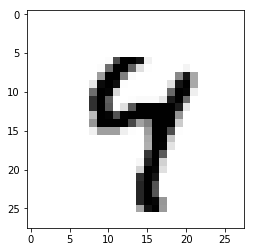

In [91]:
plt.imshow(sample, cmap = 'Greys')

In [92]:
sample =mnist.train.images[123].reshape(28,28)

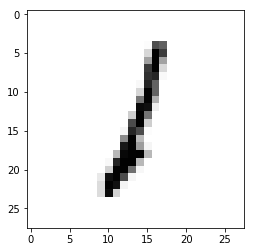

In [93]:
plt.imshow(sample, cmap = 'Greys')

In [94]:
sample =mnist.train.images[2034].reshape(28,28)

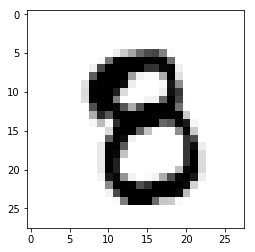

In [95]:
plt.imshow(sample, cmap = 'Greys')

In [161]:
learning_rate = 0.001
training_epochs = 1000
batch_size = 100

In [162]:
n_classes =10
n_sample = mnist.train.num_examples

In [163]:
n_sample

55000

In [164]:
n_input = 784

In [165]:
n_hidden_1 = 256
n_hidden_2 = 256

In [166]:
def multilayer_perceptron(x, weights, biases):
    """
    x: placeholder for data input
    weights : dict of weights
    biases: dict of bias values
    """
    
    ## first hidden layer with RELU - rectifier activation function
    
    #x*weight +Bias
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    
    #FUNC(X *weight +Bias), function =RELU -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    #Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #Last output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer
    
    

In [167]:
weights ={
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [168]:
weights

{'h1': <tf.Variable 'Variable_21:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_22:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_23:0' shape=(256, 10) dtype=float32_ref>}

In [169]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [170]:
x =tf.placeholder('float', [None,n_input])

In [171]:
y = tf.placeholder('float', [None,n_classes])

In [172]:
pred = multilayer_perceptron(x,weights,biases)

In [173]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels = y))


In [174]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


In [175]:

t =mnist.train.next_batch(10)

In [176]:
len(t)

2

In [177]:
len(t[0])

10

In [178]:
len(t[1])

10

In [179]:
t =mnist.train.next_batch(1)

In [180]:
Xsamp,ysamp =t

In [181]:
Xsamp

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [182]:
Xsamp.reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

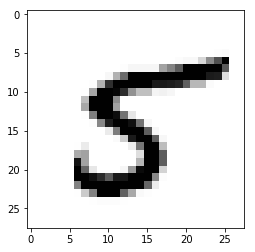

In [183]:
plt.imshow(Xsamp.reshape(28,28), cmap ='Greys')

In [184]:
ysamp

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [185]:
sess = tf.InteractiveSession()

C:\Users\kashi\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [186]:
init = tf.initialize_all_variables()

In [187]:

sess.run(init)

In [188]:
#15 loops
for epoch in range(training_epochs):
    #cost
    avg_cost = 0.0
    
    total_batch = int(n_sample/batch_size)
    
    for i in range(total_batch):
        batch_x, batch_y =mnist.train.next_batch(batch_size)
        _,c = sess.run([optimizer,cost], feed_dict={x:batch_x, y:batch_y})
        avg_cost +=c/total_batch
        
    print("Epoch: {} cost{:.4f}".format(epoch+1, avg_cost))

print("Model has completed {} Epochs of training".format(training_epochs))

Epoch: 1 cost155.7580
Epoch: 2 cost41.5862
Epoch: 3 cost26.1094
Epoch: 4 cost18.4129
Epoch: 5 cost13.2721
Epoch: 6 cost9.8473
Epoch: 7 cost7.2480
Epoch: 8 cost5.4025
Epoch: 9 cost4.1713
Epoch: 10 cost3.0144
Epoch: 11 cost2.3124
Epoch: 12 cost1.7948
Epoch: 13 cost1.4145
Epoch: 14 cost1.1970
Epoch: 15 cost0.8989
Epoch: 16 cost0.7584
Epoch: 17 cost0.6084
Epoch: 18 cost0.5900
Epoch: 19 cost0.4745
Epoch: 20 cost0.4834
Epoch: 21 cost0.3810
Epoch: 22 cost0.3529
Epoch: 23 cost0.3742
Epoch: 24 cost0.3983
Epoch: 25 cost0.3598
Epoch: 26 cost0.3349
Epoch: 27 cost0.2756
Epoch: 28 cost0.2508
Epoch: 29 cost0.3819
Epoch: 30 cost0.1895
Epoch: 31 cost0.2055
Epoch: 32 cost0.2511
Epoch: 33 cost0.2781
Epoch: 34 cost0.2093
Epoch: 35 cost0.2775
Epoch: 36 cost0.2612
Epoch: 37 cost0.1540
Epoch: 38 cost0.2007
Epoch: 39 cost0.2535
Epoch: 40 cost0.2193
Epoch: 41 cost0.1907
Epoch: 42 cost0.1922
Epoch: 43 cost0.1699
Epoch: 44 cost0.1652
Epoch: 45 cost0.1872
Epoch: 46 cost0.1715
Epoch: 47 cost0.1548
Epoch: 48 cost0.

Epoch: 379 cost0.0000
Epoch: 380 cost0.0000
Epoch: 381 cost0.0000
Epoch: 382 cost0.0000
Epoch: 383 cost0.0000
Epoch: 384 cost0.0000
Epoch: 385 cost0.0000
Epoch: 386 cost0.0000
Epoch: 387 cost0.0000
Epoch: 388 cost0.0000
Epoch: 389 cost0.0000
Epoch: 390 cost0.0000
Epoch: 391 cost0.0000
Epoch: 392 cost0.0000
Epoch: 393 cost0.0000
Epoch: 394 cost0.0000
Epoch: 395 cost0.0000
Epoch: 396 cost0.0000
Epoch: 397 cost0.0000
Epoch: 398 cost0.0000
Epoch: 399 cost0.0000
Epoch: 400 cost0.0000
Epoch: 401 cost0.0000
Epoch: 402 cost0.0000
Epoch: 403 cost0.0000
Epoch: 404 cost0.0000
Epoch: 405 cost0.0000
Epoch: 406 cost0.0000
Epoch: 407 cost0.0000
Epoch: 408 cost0.0000
Epoch: 409 cost0.0000
Epoch: 410 cost0.0000
Epoch: 411 cost0.0000
Epoch: 412 cost0.0000
Epoch: 413 cost0.0000
Epoch: 414 cost0.0000
Epoch: 415 cost0.0000
Epoch: 416 cost0.0000
Epoch: 417 cost0.0000
Epoch: 418 cost0.0000
Epoch: 419 cost0.0000
Epoch: 420 cost0.0000
Epoch: 421 cost0.0000
Epoch: 422 cost0.0000
Epoch: 423 cost0.0000
Epoch: 424

Epoch: 752 cost0.0000
Epoch: 753 cost0.0000
Epoch: 754 cost0.0000
Epoch: 755 cost0.0000
Epoch: 756 cost0.0000
Epoch: 757 cost0.0000
Epoch: 758 cost0.0000
Epoch: 759 cost0.0000
Epoch: 760 cost0.0000
Epoch: 761 cost0.0000
Epoch: 762 cost0.0000
Epoch: 763 cost0.0000
Epoch: 764 cost0.0000
Epoch: 765 cost0.0000
Epoch: 766 cost0.0000
Epoch: 767 cost0.0000
Epoch: 768 cost0.0000
Epoch: 769 cost0.0000
Epoch: 770 cost0.0000
Epoch: 771 cost0.0000
Epoch: 772 cost0.0000
Epoch: 773 cost0.0000
Epoch: 774 cost0.0000
Epoch: 775 cost0.0000
Epoch: 776 cost0.0000
Epoch: 777 cost0.0000
Epoch: 778 cost0.0000
Epoch: 779 cost0.0000
Epoch: 780 cost0.0000
Epoch: 781 cost0.0000
Epoch: 782 cost0.0000
Epoch: 783 cost0.0000
Epoch: 784 cost0.0000
Epoch: 785 cost0.0000
Epoch: 786 cost0.0000
Epoch: 787 cost0.0000
Epoch: 788 cost0.0000
Epoch: 789 cost0.0000
Epoch: 790 cost0.0000
Epoch: 791 cost0.0000
Epoch: 792 cost0.0000
Epoch: 793 cost0.0000
Epoch: 794 cost0.0000
Epoch: 795 cost0.0000
Epoch: 796 cost0.0000
Epoch: 797

In [189]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [190]:
print(correct_predictions[0])

Tensor("strided_slice_2:0", shape=(), dtype=bool)


In [191]:
correct_predictions = tf.cast(correct_predictions, 'float')

In [192]:
print(correct_predictions[0])

Tensor("strided_slice_3:0", shape=(), dtype=float32)


In [193]:
accuracy = tf.reduce_mean(correct_predictions)

In [194]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [195]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [196]:
mnist.test.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [197]:
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.9758